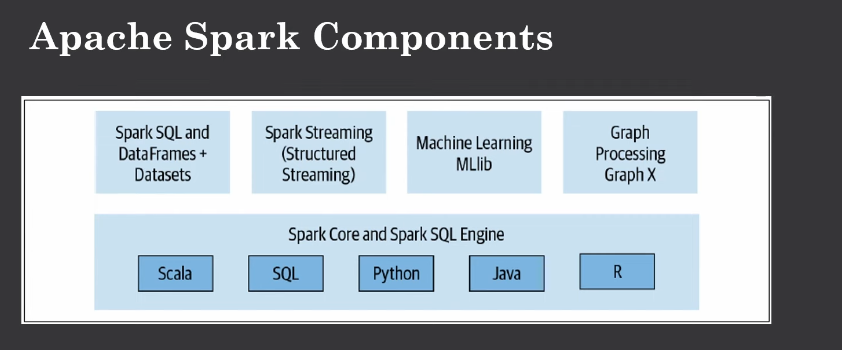

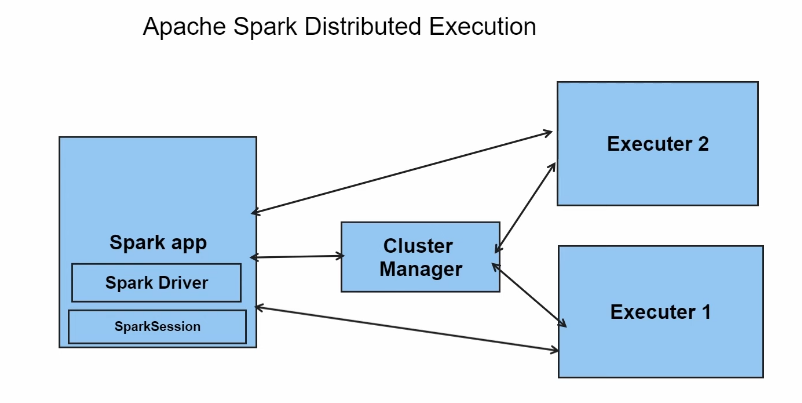

# Spark Application Concepts
- Application
- Spark Session
- Job
- Stage
- Task

### Spark Application

#### What is a Spark Application?

- A **Spark Application** is the **top-level unit of execution** in Spark.
- It consists of:
  - A **driver program** (your main code).
  - One or more **executor processes** running tasks.
- Each application runs indepe1ndently and manages its own cluster resources.

#### Example
- An ETL pipeline written in PySpark
- A machine learning model training job

> **Analogy:** A complete **movie production** — the driver is the director, executors are the actors.

---

### SparkSession

#### What is a SparkSession?

- A **SparkSession** is the **entry point** to Spark functionality.
- Combines:
  - SparkContext
  - SQLContext
  - HiveContext
- Introduced in Spark 2.0 for unified access.

#### Sample Code

```python
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("ExampleApp") \
    .getOrCreate()
```


---

### Spark Job

#### What is a Job?

- A **Job** is triggered by a **Spark action**, like:
  - `count()`
  - `collect()`
  - `save()`
- Spark breaks down each action into one or more jobs.
- Jobs are divided into stages internally.

#### Example

```python
df.count()  # Triggers a Spark job
```

---

###  Spark Stage

#### What is a Stage?

- A **Stage** is a group of **parallel tasks** that execute the same code on different data.
- Spark creates a new stage at **shuffle boundaries**.
- Two types:
  - **ShuffleMapStage** – produces intermediate results.
  - **ResultStage** – computes final results.

#### Internal Use
- Created automatically by the **DAG Scheduler**.

> **Analogy:** A **step** or setup within a scene — based on camera angles or location.
.

---
### Spark Task

#### What is a Task?

- A **Task** is the **smallest unit of work** in Spark.
- Each task runs on a **single partition** of the data.
- All tasks in a stage do the same computation on different partitions.

#### Execution
- Distributed to **executors**.
- Runs in parallel across the cluster.

> **Analogy:** A single **take** of a shot done by one camera in the movie.


## Apache Spark Execution Architecture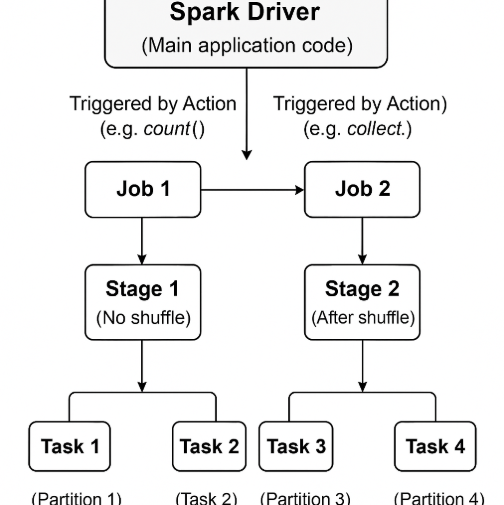   (Partition 3)  (Partition 4)


## Lazy Evaluation

Spark operations : 
- Transformation (-> gives new RDD from an RDD) --> narrow and wide T
- Action (TO work with actual RDD it is used , no new RDD)

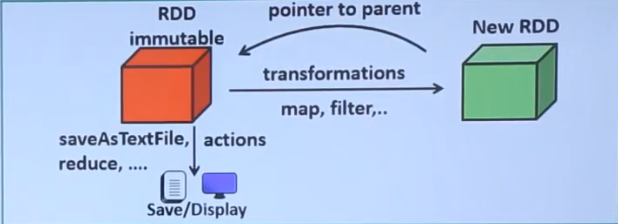

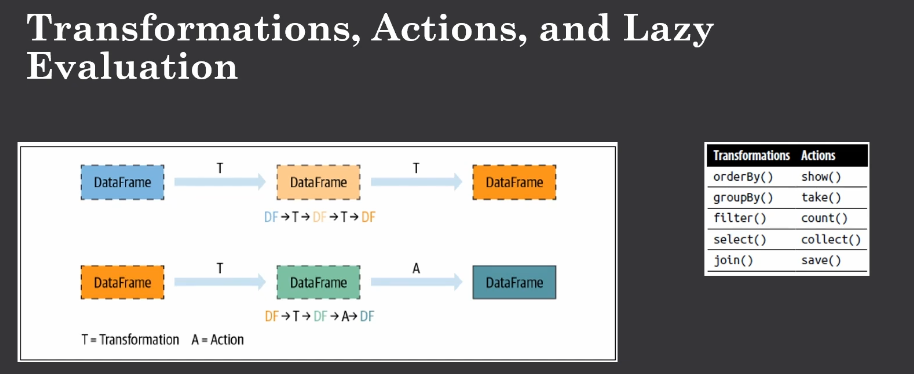

# Lazy Evaluation in Apache Spark

Lazy evaluation is a key optimization in Apache Spark where **transformations are not executed immediately**. Instead, Spark builds a **logical execution plan** (DAG) and waits until an **action** is called.

---

## How It Works

- **Transformations** (e.g., `map()`, `filter()`, `flatMap()`) are **lazy** — they define a plan but do not compute anything immediately.
- **Actions** (e.g., `count()`, `collect()`, `show()`) **trigger the actual execution** of the plan.

---

## Why Lazy Evaluation?

1.  **Optimization**: Spark optimizes the entire execution plan before running it.
2.  **Efficiency**: Avoids intermediate results and reduces unnecessary computations.
3.  **Fault Tolerance**: Maintains lineage, allowing recovery of lost data through recomputation.

---

##  Example

```python
rdd = sc.textFile("data.txt")                      # No computation yet
words = rdd.flatMap(lambda x: x.split())           # Still lazy
filtered = words.filter(lambda w: len(w) > 3)      # Still lazy
count = filtered.count()                           # Execution triggered here


# Types of Transformation
###  Narrow vs Wide Transformations in Apache Spark

In Spark, **transformations** are operations on RDDs or DataFrames. They are classified into:

- 🔹 **Narrow Transformations**
- 🔸 **Wide Transformations**

---



#### 🔹 Narrow Transformations

##### ✅ Definition:
A **narrow transformation** is where **each input partition contributes to only one output partition**. No data is shuffled across the network.

##### 🧪 Examples:
- `map()`
- `filter()`
- `flatMap()`
- `union()`

##### 🚀 Characteristics:
- Data **does not move between partitions**.
- Can be **executed in a pipeline**.
- **Faster and less expensive**.

##### 📌 Visual:

```plaintext
Input Partition 1 ───▶ Output Partition 1
Input Partition 2 ───▶ Output Partition 2

#### 🔸 Wide Transformations

##### ✅ Definition:

Wide transformations occur when **data from multiple partitions** of the parent RDD/DataFrame is required to compute **a single partition** of the resulting RDD/DataFrame.

These transformations **trigger a shuffle**, meaning data is moved across the cluster over the network.

##### 🧪 Examples:

- `groupByKey()`
- `reduceByKey()`
- `join()`
- `distinct()`
- `cogroup()`


###### 🐢 Characteristics:

- Involve **data shuffling** across the network.
- Are **more expensive** due to disk and network I/O.
- Create **new stages** in the DAG (Directed Acyclic Graph).
- Cannot be pipelined like narrow transformations.


##### 📌 Visual Representation (Conceptual)

```plaintext
Input Partition 1 ─┬─▶ Output Partition 1
Input Partition 2 ─┘
                   └─▶ Output Partition 2 (after shuffle)


## Spark UI

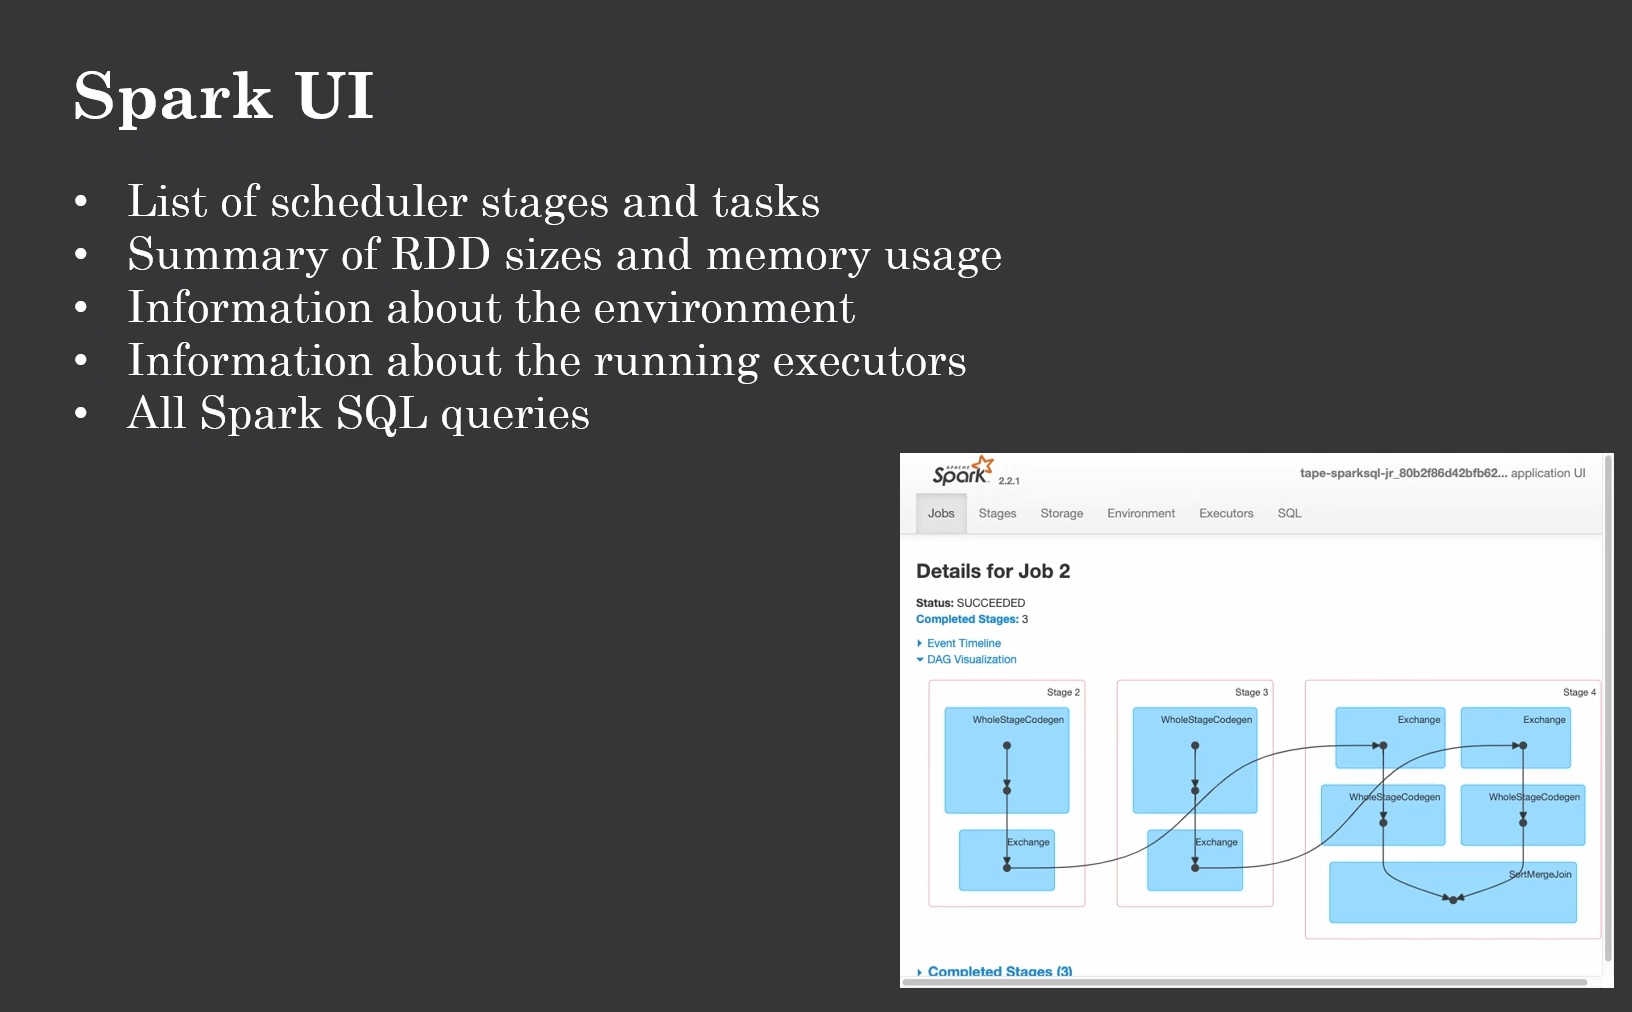